In [1]:
#Using SIBYLL2.1 for 2012 MC
#Goal: Make usable for all Interaction Models and Years --> using save_data.py

In [123]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [124]:
# Load in the SIBYLL2.1 particle sims
#Using saved_data.py to save year, interaction model
KEYS = ['energy', 'type', 'nstrings', 'IceTop_reco_succeeded', 'showerplanezen', 'laputopzen', 'Hweights', 'Gweights']

#give dictionary year and model you want to run, then you can call the key names later (like I did in the dataframe I made
#below
year = 2012
simulation = "SIBYLL2.1"

for key in KEYS:
    if os.path.isfile(f'saved_data/{year}/{simulation}/{key}.npy'):
        with open(f'saved_data/{year}/{simulation}/{key}.npy', 'rb') as file:
            globals()[key] = np.load(file)

In [125]:
#Define weighted quantiles function so you can take weighted medians of Energy/Rigidity
def weighted_quantiles(values, weights, quantiles=0.5):
    i = np.argsort(values) #sorts values by some metric
    c = np.cumsum(weights[i]) #cumulative sum of elements along given axis
    return values[i[np.searchsorted(c, np.array(quantiles) * c[-1])]]

In [126]:
#Dataframe that loads nStations, Primary Energy, Weights, type cuts, quality cuts
#Will use to make cuts based on above attributes, and will take remaining values in each column into same-sized arrays
#to plot
df = pd.DataFrame({'nStations': nstrings, 'Primary Energy': energy, 'weightsH4a': Hweights, 'weightsGSF': Gweights, 'type': type, 'reco': IceTop_reco_succeeded, 'showerplane': showerplanezen, 'laputop': laputopzen})
#print(df)

In [127]:
#Energy tier cut definitions, reconstruction passed quality cut, and max zenith quality cut
#reconstruction uses showerplane for tier 1 events and laputop for tiers 3-4 events, so we will use the same in simulation
#established by slicing the array. (Tier Cuts only apply for 2012)
tier1 = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['showerplane'] < np.radians(55))] #& (df['reco']==1)]
tier2 = df[(df['nStations'] >= 5) & (df['nStations'] < 9 ) & (df['laputop'] < np.radians(55)) & (df['reco']==1)]
tier3 = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['laputop'] < np.radians(55)) & (df['reco']==1)]
tier4 = df[(df['nStations'] >=16) & (df['laputop'] < np.radians(55)) & (df['reco']==1)]

In [128]:
#Creates same-sized arrays for each z value that makes up the composition
#tier #-sized array
zvals = np.zeros(tier1['Primary Energy'].size)
#proton (makes array of same-size that only contains each atomic number --> can be used to divide each 
#discrete energy by the atomic number of its primary particle --> get rigidity
protonz = zvals[tier1['type'] ==2212.0] = 1
#helium
heliumz = zvals[tier1['type'] ==1000020040.0] = 2
#oxygen
oxygenz = zvals[tier1['type']==1000080160.0] = 8
#iron
ironz = zvals[tier1["type"] == 1000080160] = 26

In [129]:
#no reco passed cut for tier 1, because reco cut fails for all tier 1 events

#tier 1
tier1energy = tier1['Primary Energy'].to_numpy() #array of all primary energy values that correspond to tier 1 events
weightsH4a1 = tier1['weightsH4a'].to_numpy() #array of all weights using H4a that correspond to tier 1 events
weightsGSF1 = tier1['weightsGSF'].to_numpy() #array of all weights using GSF that correspond to tier 1 events
#all arrays made above are the same size, and each weight array can be used as the weight for the energy array in a histogram

#tier 1 proton
#tier1p does the same as tier1 cut, but adds in the composition cut of the primary particle being a proton
tier1p = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==2212.0) & (df['showerplane'] < np.radians(55))] #(df['reco']==1)}
t1penergy = tier1p['Primary Energy'].to_numpy()
weightsH4a1p = tier1p['weightsH4a'].to_numpy()
weightsGSF1p = tier1p['weightsGSF'].to_numpy()
#below divides each energy value in the primary energy array of tier1 proton events by the z value for protons (1)
rigidityt1p = t1penergy / protonz

#tier 1 helium
tier1h = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==1000020040.0) & (df['showerplane'] < np.radians(55))]
t1henergy = tier1h['Primary Energy'].to_numpy()
weightsH4a1h = tier1h['weightsH4a'].to_numpy()
weightsGSF1h = tier1h['weightsGSF'].to_numpy()
rigidityt1h = t1henergy / heliumz

#tier 1 oxygen
tier1o = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==1000080160.0) & (df['showerplane'] < np.radians(55))]
t1oenergy = tier1o['Primary Energy'].to_numpy()
weightsH4a1o = tier1o['weightsH4a'].to_numpy()
weightsGSF1o = tier1o['weightsGSF'].to_numpy()
rigidityt1o = t1oenergy / oxygenz

#tier 1 iron
tier1Fe = df[(df['nStations'] >= 3) & (df['nStations'] < 5) & (df['type'] ==1000260560.0) & (df['showerplane'] < np.radians(55))] #(df['reco']==1)]
t1Feenergy = tier1Fe['Primary Energy'].to_numpy()
weightsH4a1Fe = tier1Fe['weightsH4a'].to_numpy()
weightsGSF1Fe = tier1Fe['weightsGSF'].to_numpy()
rigidityt1Fe = t1Feenergy / ironz

#tier 2
tier2energy = tier2['Primary Energy'].to_numpy()
weightsH4a2 = tier2['weightsH4a'].to_numpy()
weightsGSF2 = tier2['weightsGSF'].to_numpy()

#tier 2 proton
tier2p = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==2212.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t2penergy = tier2p['Primary Energy'].to_numpy()
weightsH4a2p = tier2p['weightsH4a'].to_numpy()
weightsGSF2p = tier2p['weightsGSF'].to_numpy()
rigidityt2p = t2penergy / protonz

#tier 2 helium
tier2h = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==1000020040.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t2henergy = tier2h['Primary Energy'].to_numpy()
weightsH4a2h = tier2h['weightsH4a'].to_numpy()
weightsGSF2h = tier2h['weightsGSF'].to_numpy()
rigidityt2h = t2henergy / heliumz

#tier 2 oxygen
tier2o = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==1000080160.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t2oenergy = tier2o['Primary Energy'].to_numpy()
weightsH4a2o = tier2o['weightsH4a'].to_numpy()
weightsGSF2o = tier2o['weightsGSF'].to_numpy()
rigidityt2o = t2oenergy / oxygenz

#tier 2 iron
tier2Fe = df[(df['nStations'] >= 5) & (df['nStations'] < 9) & (df['type'] ==1000260560.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t2Feenergy = tier2Fe['Primary Energy'].to_numpy()
weightsH4a2Fe = tier2Fe['weightsH4a'].to_numpy()
weightsGSF2Fe = tier2Fe['weightsGSF'].to_numpy()
rigidityt2Fe = t2Feenergy / ironz

#tier 3 
tier3energy = tier3['Primary Energy'].to_numpy()
weightsH4a3 = tier3['weightsH4a'].to_numpy()
weightsGSF3 = tier3['weightsGSF'].to_numpy()

#tier 3 proton
tier3p = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==2212.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t3penergy = tier3p['Primary Energy'].to_numpy()
weightsH4a3p = tier3p['weightsH4a'].to_numpy()
weightsGSF3p = tier3p['weightsGSF'].to_numpy()
rigidityt3p = t3penergy / protonz

#tier 3 helium
tier3h = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==1000020040.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t3henergy = tier3h['Primary Energy'].to_numpy()
weightsH4a3h = tier3h['weightsH4a'].to_numpy()
weightsGSF3h = tier3h['weightsGSF'].to_numpy()
rigidityt3h = t3henergy / heliumz

#tier 3 oxygen
tier3o = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==1000080160.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t3oenergy = tier3o['Primary Energy'].to_numpy()
weightsH4a3o = tier3o['weightsH4a'].to_numpy()
weightsGSF3o = tier3o['weightsGSF'].to_numpy()
rigidityt3o = t3oenergy / oxygenz

#tier 3 iron
tier3Fe = df[(df['nStations'] >= 9) & (df['nStations'] < 16) & (df['type'] ==1000260560.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t3Feenergy = tier3Fe['Primary Energy'].to_numpy()
weightsH4a3Fe = tier3Fe['weightsH4a'].to_numpy()
weightsGSF3Fe = tier3Fe['weightsGSF'].to_numpy()
rigidityt3Fe = t3Feenergy / ironz

#tier 4
tier4energy = tier4['Primary Energy'].to_numpy()
weightsH4a4 = tier4['weightsH4a'].to_numpy()
weightsGSF4 = tier4['weightsGSF'].to_numpy()

#tier 4 proton
tier4p = df[(df['nStations'] >= 16) & (df['type'] ==2212.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t4penergy = tier4p['Primary Energy'].to_numpy()
weightsH4a4p = tier4p['weightsH4a'].to_numpy()
weightsGSF4p = tier4p['weightsGSF'].to_numpy()
rigidityt4p = t4penergy / protonz

#tier 4 helium
tier4h = df[(df['nStations'] >= 16) & (df['type'] ==1000020040.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t4henergy = tier4h['Primary Energy'].to_numpy()
weightsH4a4h = tier4h['weightsH4a'].to_numpy()
weightsGSF4h = tier4h['weightsGSF'].to_numpy()
rigidityt4h = t4henergy / heliumz

#tier 4 oxygen
tier4o = df[(df['nStations'] >= 16) & (df['type'] ==1000080160.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t4oenergy = tier4o['Primary Energy'].to_numpy()
weightsH4a4o = tier4o['weightsH4a'].to_numpy()
weightsGSF4o = tier4o['weightsGSF'].to_numpy()
rigidityt4o = t4oenergy / oxygenz

#tier 4 iron
tier4Fe = df[(df['nStations'] >= 16) & (df['type'] ==1000260560.0) & (df['reco']==1) & (df['laputop'] < np.radians(55))]
t4Feenergy = tier4Fe['Primary Energy'].to_numpy()
weightsH4a4Fe = tier4Fe['weightsH4a'].to_numpy()
weightsGSF4Fe = tier4Fe['weightsGSF'].to_numpy()
rigidityt4Fe = t4Feenergy / ironz

In [130]:
#Append the rigidity arrays and weighter arrays for each composition type --> so one histogram shows all events summed
#each scaled according to their specific z value
t1rigidity = np.append(np.append(rigidityt1p, rigidityt1h), np.append(rigidityt1o, rigidityt1Fe))
H4a1weights = np.append(np.append(weightsH4a1p, weightsH4a1h), np.append(weightsH4a1o, weightsH4a1Fe))
GSF1weights = np.append(np.append(weightsGSF1p, weightsGSF1h), np.append(weightsGSF1o, weightsGSF1Fe))

t2rigidity = np.append(np.append(rigidityt2p, rigidityt2h), np.append(rigidityt2o, rigidityt2Fe))
H4a2weights = np.append(np.append(weightsH4a2p, weightsH4a2h), np.append(weightsH4a2o, weightsH4a2Fe))
GSF2weights = np.append(np.append(weightsGSF2p, weightsGSF2h), np.append(weightsGSF2o, weightsGSF2Fe))

t3rigidity = np.append(np.append(rigidityt3p, rigidityt3h), np.append(rigidityt3o, rigidityt3Fe))
H4a3weights = np.append(np.append(weightsH4a3p, weightsH4a3h), np.append(weightsH4a3o, weightsH4a3Fe))
GSF3weights = np.append(np.append(weightsGSF3p, weightsGSF3h), np.append(weightsGSF3o, weightsGSF3Fe))

t4rigidity = np.append(np.append(rigidityt4p, rigidityt4h), np.append(rigidityt4o, rigidityt4Fe))
H4a4weights = np.append(np.append(weightsH4a4p, weightsH4a4h), np.append(weightsH4a4o, weightsH4a4Fe))
GSF4weights = np.append(np.append(weightsGSF4p, weightsGSF4h), np.append(weightsGSF4o, weightsGSF4Fe))

In [131]:
#taking median rigidity for each tier --> with weighting applied
t1medianH4a = round(weighted_quantiles(t1rigidity, H4a1weights), 2)
t1medianGSF = round(weighted_quantiles(t1rigidity, GSF1weights), 2)
t2medianH4a = round(weighted_quantiles(t2rigidity, H4a2weights), 2)
t2medianGSF = round(weighted_quantiles(t2rigidity, GSF2weights), 2)
t3medianH4a = round(weighted_quantiles(t3rigidity, H4a3weights), 2)
t3medianGSF = round(weighted_quantiles(t3rigidity, GSF3weights), 2)
t4medianH4a = round(weighted_quantiles(t4rigidity, H4a4weights), 2)
t4medianGSF = round(weighted_quantiles(t4rigidity, GSF4weights), 2)

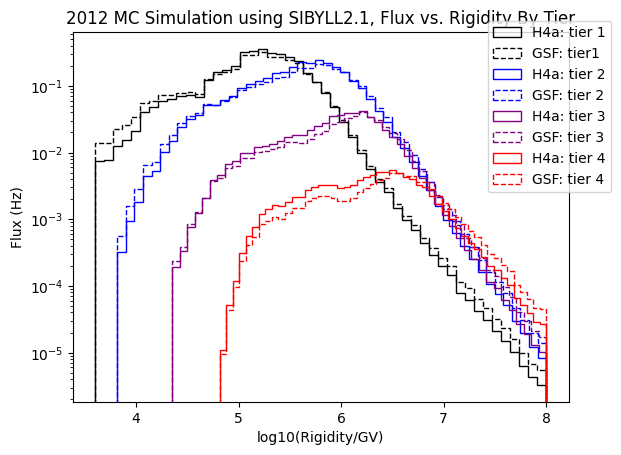

 H4a Median(Log10(Rigidity)): 5.2 GV
 GSF Median(Log10(Rigidity)): 5.19 GV
 H4a Median(Log10(Rigidity)): 5.64 GV
 GSF Median(Log10(Rigidity)): 5.65 GV
 H4a Median(Log10(Rigidity)): 5.99 GV
 GSF Median(Log10(Rigidity)): 6.06 GV
 H4a Median(Log10(Rigidity)): 6.3 GV
 GSF Median(Log10(Rigidity)): 6.45 GV


In [132]:
#plotting rigidity for each tier, with two different weighter types (H4a, GSF)
ax = plt.subplot(1, 1, 1)
(t1_, binst1_, patches1_) = plt.hist(np.log10(t1rigidity), bins=50, log=True, weights=H4a1weights, histtype='step', color='black', label='H4a: tier 1')
(t1, binst1, patches1) = plt.hist(np.log10(t1rigidity), bins=50, log=True, weights=GSF1weights, histtype='step', color='black', linestyle='dashed', label='GSF: tier1')
(t2_, binst2_, patches2_) = plt.hist(np.log10(t2rigidity), bins=50, log=True, weights=H4a2weights, histtype='step', color='blue', label='H4a: tier 2')
(t2, binst2, patches2) = plt.hist(np.log10(t2rigidity), bins=50, log=True, weights=GSF2weights, histtype='step', color='blue', linestyle='dashed', label='GSF: tier 2')
(t3_, binst3_, patches3_) = plt.hist(np.log10(t3rigidity), bins=50, log=True, weights=H4a3weights, histtype='step', color='purple', label='H4a: tier 3')
(t3, binst3, patches3) = plt.hist(np.log10(t3rigidity), bins=50, log=True, weights=GSF3weights, histtype='step', color='purple', linestyle='dashed', label='GSF: tier 3')
(t4_, binst4_, patches4_) = plt.hist(np.log10(t4rigidity), bins=50, log=True, weights=H4a4weights, histtype='step', color='red', label='H4a: tier 4')
(t4, binst4, patches4) = plt.hist(np.log10(t4rigidity), bins=50, log=True, weights=GSF4weights, histtype='step', color='red', linestyle='dashed', label='GSF: tier 4')
plt.xlabel('log10(Rigidity/GV)')
plt.ylabel('Flux (Hz)')
plt.title('2012 MC Simulation using SIBYLL2.1, Flux vs. Rigidity By Tier')
plt.legend()
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()
#print(t4_)

#Median Rigidity
print(f' H4a Median(Log10(Rigidity)): {round(np.log10(t1medianH4a), 2)} GV')
print(f' GSF Median(Log10(Rigidity)): {round(np.log10(t1medianGSF), 2)} GV')
print(f' H4a Median(Log10(Rigidity)): {round(np.log10(t2medianH4a), 2)} GV')
print(f' GSF Median(Log10(Rigidity)): {round(np.log10(t2medianGSF), 2)} GV')
print(f' H4a Median(Log10(Rigidity)): {round(np.log10(t3medianH4a), 2)} GV')
print(f' GSF Median(Log10(Rigidity)): {round(np.log10(t3medianGSF), 2)} GV')
print(f' H4a Median(Log10(Rigidity)): {round(np.log10(t4medianH4a), 2)} GV')
print(f' GSF Median(Log10(Rigidity)): {round(np.log10(t4medianGSF), 2)} GV')

In [133]:
#function that takes two gaussians --> fit function using histogram bin edges and bin heights
from scipy.optimize import curve_fit
from scipy import stats
from scipy import integrate
import sympy as sy
from sklearn import preprocessing

In [214]:
#Tier 1 H4a:
x_t1H4a = (binst1_[1:] + binst1_[:-1])/2

def double_gaussian(x_t1H4a, A1, x0, sigma1, A2, x0_, sigma2):
    return (A1 * np.exp(-((x_t1H4a - x0) **2) / (2 * (sigma1 **2)))) + (A2 * np.exp(-((x_t1H4a - x0_) **2) / (2 *(sigma2 **2))))
initial_guess = [0.1, 4.2, 0.8, 0.3, 5.2, 0.8]
popt1, pcov1 = curve_fit(double_gaussian, x_t1H4a, t1_, p0=initial_guess, maxfev=500000)
err1 = np.sqrt(np.diag(pcov1))

print('Fit values for Double Gaussian Curve:')
print(popt1)
print('--------------------------------')
print('Covariance Matrix for Fit Values:')
print(pcov1)
print('--------------------------------')
print('Error of Fit:')
print(err1)
y1H_fit = (popt1[0] * np.exp(-((x_t1H4a - popt1[1]) **2) / (2 * (popt1[2] **2)))) + (popt1[3] * np.exp(-((x_t1H4a - popt1[4]) **2) / (2 *(popt1[5] **2))))

Fit values for Double Gaussian Curve:
[ 0.07493123  4.88624925 -0.63241675  0.28145211  5.28534681  0.30224385]
--------------------------------
Covariance Matrix for Fit Values:
[[ 3.82982684e-04  2.19733146e-03  5.60011618e-04 -3.92118515e-04
   1.04387210e-04 -2.92397568e-04]
 [ 2.19733146e-03  1.74909358e-02  8.79850565e-04 -2.62394818e-03
   5.81411422e-05 -1.85634472e-03]
 [ 5.60011618e-04  8.79850565e-04  4.00965764e-03 -3.47890585e-04
   5.76783509e-04 -1.84657539e-04]
 [-3.92118515e-04 -2.62394818e-03 -3.47890585e-04  4.68066336e-04
  -6.17133136e-05  2.90214183e-04]
 [ 1.04387210e-04  5.81411422e-05  5.76783509e-04 -6.17133136e-05
   1.58264065e-04 -4.73274446e-05]
 [-2.92397568e-04 -1.85634472e-03 -1.84657539e-04  2.90214183e-04
  -4.73274446e-05  2.98422707e-04]]
--------------------------------
Error of Fit:
[0.01956994 0.1322533  0.06332186 0.02163484 0.0125803  0.01727492]


In [272]:
#Finding Mean: Tier 1 H4a

#finding mean:
#use expected value function <x> = int( x * f(x) dx) / int(f(x) dx where f is curve fit (PDF)
integrand_top = lambda x: x * ((popt1[0] * np.exp(-((x - popt1[1]) **2) / (2 * (popt1[2] **2)))) + (popt1[3] * np.exp(-((x - popt1[4]) **2) / (2 *(popt1[5] **2)))))
integrand_bottom = lambda x: (popt1[0] * np.exp(-((x - popt1[1]) **2) / (2 * (popt1[2] **2)))) + (popt1[3] * np.exp(-((x - popt1[4]) **2) / (2 *(popt1[5] **2))))
a = 0 #a and b are bounds of integral
b = x_t1H4a[-1]

result_top, error_top = integrate.quad(integrand_top, a, b) #taking integral
result_bottom, error_bottom = integrate.quad(integrand_bottom, a, b)
result1 = result_top / result_bottom

Median of Data: 5.23 GV


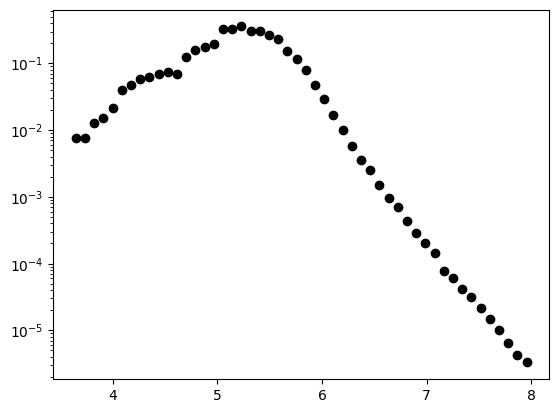

In [273]:
#t1 H4a Median:
data = plt.scatter(x_t1H4a, t1_, color='black', label='Data')
plt.yscale('log')

data_points = data.get_offsets()
x_unpacked = data_points[:, 0]
y_unpacked = data_points[:, 1]
a = y_unpacked[0]
b = y_unpacked[-1]
area = np.trapz(y_unpacked, x_unpacked)
sum_y = sum(y_unpacked)
y_testn = y_unpacked / sum_y
y_normalized = y_unpacked / area
normalized_area = np.trapz(y_normalized, x_unpacked)

target = 0.5
#sum y's in dataframe until sum reaches 0.5
def sum_until_target(y_testn, target):
    current_sum = 0
    included_indices = []
    for i, num in enumerate(y_testn):
        if current_sum + num <= target:
            current_sum += num
            included_indices.append(i)
        else:
            break
    return current_sum, included_indices
sum_result, indices = sum_until_target(y_testn, target)
    
median_len_x = len(indices)
#print(median_len_x)
median_x1 = x_unpacked[median_len_x]
print('Median of Data:', round(median_x1, 2), 'GV')

Mean is: 5.14256 GV
Median is: 5.23001 GV


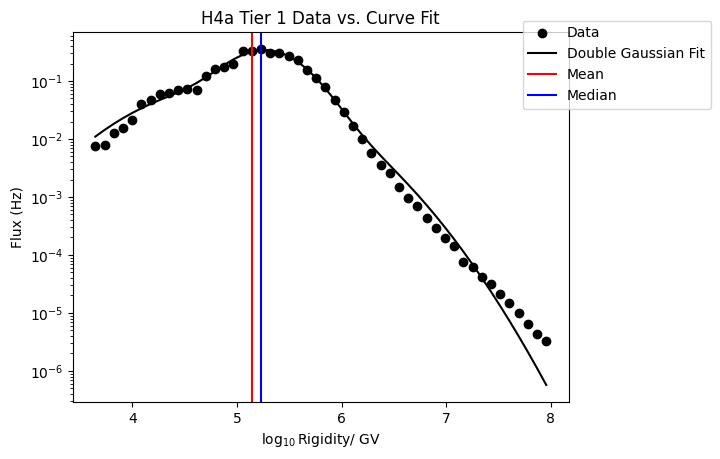

In [274]:
#Plotting t1 H4a
ax = plt.subplot(1, 1, 1)
data = plt.scatter(x_t1H4a, t1_, color='black', label='Data')
plt.plot(x_t1H4a, y1H_fit, color='black', label='Double Gaussian Fit')
plt.yscale('log')
print("Mean is:", round(result1, 5), "GV")
print("Median is:", round(median_x1, 5), "GV")
plt.xlabel('$\log_{{10}}$Rigidity/ GV')
plt.ylabel('Flux (Hz)')
plt.title('H4a Tier 1 Data vs. Curve Fit')

plt.axvline(result1, color='red', label='Mean')
plt.axvline(median_x1, color='blue', label='Median')

plt.legend()
ax.legend(bbox_to_anchor=(1.30, 1.05))
plt.show()
plt.show()

In [275]:
#H4a: Tier 2
x_t2H4a = (binst2_[1:] + binst2_[:-1])/2

def double_gaussian(x_t2H4a, A1, x0, sigma1, A2, x0_, sigma2):
    return (A1 * np.exp(-((x_t2H4a - x0) **2) / (2 * (sigma1 **2)))) + (A2 * np.exp(-((x_t2H4a - x0_) **2) / (2 * (sigma2 **2))))

initial_guess = [0.25, 4.5,  0.718, 0.25, 6, 0.718]
popt2, pcov2 = curve_fit(double_gaussian, x_t2H4a, t2_, p0=initial_guess)
err2 = np.sqrt(np.diag(pcov2))

print('Fit values for Single Gaussian Curve:')
print(popt2)
print('--------------------------------')
print('Covariance Matrix for Fit Values:')
print(pcov2)
print('--------------------------------')
print('Error of Fit:')
print(err2)
y2H_fit = (popt2[0] * np.exp(-((x_t2H4a - popt2[1]) **2) / (2 * (popt2[2] **2)))) + (popt2[3] * np.exp(-((x_t2H4a - popt2[4]) **2) / (2 * (popt2[5] **2))))

Fit values for Single Gaussian Curve:
[ 0.11942604  5.44694279 -0.53765556  0.13532661  5.81122842  0.26105792]
--------------------------------
Covariance Matrix for Fit Values:
[[ 3.67296005e-05  1.25565141e-04  1.45397654e-05 -3.94675759e-05
   1.57327554e-05 -5.33118309e-05]
 [ 1.25565141e-04  5.95325577e-04 -3.47885859e-05 -1.60791022e-04
  -6.30106211e-06 -2.02492697e-04]
 [ 1.45397654e-05 -3.47885859e-05  1.07103062e-04  6.22036665e-07
   5.26532692e-05  3.25548208e-06]
 [-3.94675759e-05 -1.60791022e-04  6.22036665e-07  5.05492045e-05
  -6.70866787e-06  5.61046848e-05]
 [ 1.57327554e-05 -6.30106211e-06  5.26532692e-05 -6.70866787e-06
   5.23739503e-05 -1.16926034e-05]
 [-5.33118309e-05 -2.02492697e-04  3.25548208e-06  5.61046848e-05
  -1.16926034e-05  1.02823310e-04]]
--------------------------------
Error of Fit:
[0.0060605  0.02439929 0.01034906 0.0071098  0.00723698 0.01014018]


In [276]:
#Finding Median: Tier 2 H4a

#use expected value function <x> = int( x * f(x) dx) / int(f(x) dx where f is curve fit (PDF)
integrand_top = lambda x: x * ((popt2[0] * np.exp(-((x - popt2[1]) **2) / (2 * (popt2[2] **2)))) + ((popt2[3] * np.exp(-((x - popt2[4]) **2) / (2 * (popt2[5] **2))))))
integrand_bottom = lambda x: (popt2[0] * np.exp(-((x - popt2[1]) **2) / (2 * (popt2[2] **2)))) + ((popt2[3] * np.exp(-((x - popt2[4]) **2) / (2 * (popt2[5] **2)))))
a = 0 #a and b are bounds of integral
b = x_t2H4a[-1]

result_top, error_top = integrate.quad(integrand_top, a, b) #taking integral
result_bottom, error_bottom = integrate.quad(integrand_bottom, a, b)
result2 = result_top / result_bottom

Median of Data: 5.62 GV


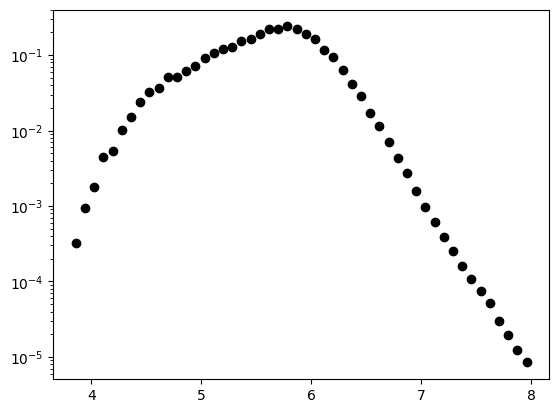

In [277]:
#t2 H4a: finding median:
data = plt.scatter(x_t2H4a, t2_, color='black', label='Data')
plt.yscale('log')

data_points = data.get_offsets()
x_unpacked = data_points[:, 0]
y_unpacked = data_points[:, 1]
a = y_unpacked[0]
b = y_unpacked[-1]
area = np.trapz(y_unpacked, x_unpacked)
sum_y = sum(y_unpacked)
y_testn = y_unpacked / sum_y
y_normalized = y_unpacked / area
normalized_area = np.trapz(y_normalized, x_unpacked)

target = 0.5
#sum y's in dataframe until sum reaches 0.5
def sum_until_target(y_testn, target):
    current_sum = 0
    included_indices = []
    for i, num in enumerate(y_testn):
        if current_sum + num <= target:
            current_sum += num
            included_indices.append(i)
        else:
            break
    return current_sum, included_indices
sum_result, indices = sum_until_target(y_testn, target)
    
median_len_x = len(indices)
#print(median_len_x)
median_x2 = x_unpacked[median_len_x]
print('Median of Data:', round(median_x2, 2), 'GV')

Mean is: 5.58 GV
Median is: 5.62 GV


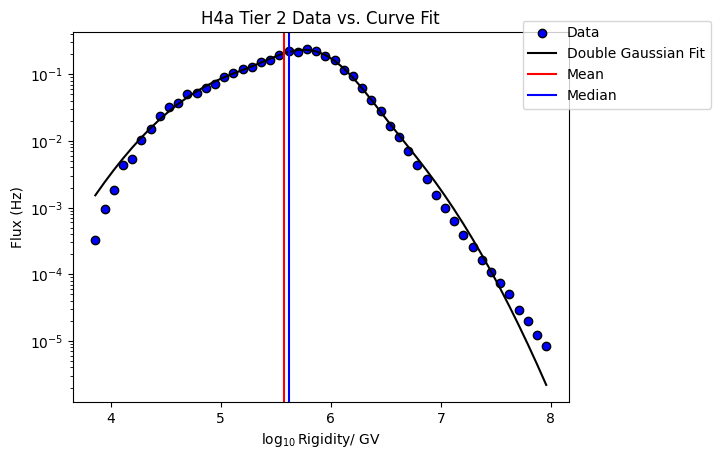

In [278]:
#Plotting T2 H4a:
ax = plt.subplot(1, 1, 1)
plt.scatter(x_t2H4a, t2_, color='blue', ec='black', label='Data')
plt.plot(x_t2H4a, y2H_fit, color='black', label='Double Gaussian Fit')
plt.yscale('log')

plt.axvline(result2, color='red', label='Mean')
plt.axvline(median_x2, color='blue', label='Median')

print("Mean is:", round(result2, 2), "GV")
print("Median is:", round(median_x2, 2), "GV")
plt.xlabel('$\log_{{10}}$Rigidity/ GV')
plt.ylabel('Flux (Hz)')
plt.title('H4a Tier 2 Data vs. Curve Fit')

plt.legend()
ax.legend(bbox_to_anchor=(1.30, 1.05))
plt.show()

In [339]:
#H4a: Tier 3
x_t3H4a = (binst3_[1:] + binst3_[:-1])/2

def double_gaussian(x_t3H4a, A1, x0, sigma1, A2, x0_, sigma2):
    return (A1 * np.exp(-((x_t3H4a - x0) **2) / (2 * (sigma1 **2)))) + (A2 * np.exp(-((x_t3H4a - x0_) **2) / (2 * (sigma2 **2))))

initial_guess = [0.1, 5.0, 0.8, 0.3, 6.2, 0.8]
popt3, pcov3 = curve_fit(double_gaussian, x_t3H4a, t3_, p0=initial_guess)
err3 = np.sqrt(np.diag(pcov3))

print('Fit values for Single Gaussian Curve:')
print(popt3)
print('--------------------------------')
print('Covariance Matrix for Fit Values:')
print(pcov3)
print('--------------------------------')
print('Error of Fit:')
print(err3)
y3H_fit = (popt3[0] * np.exp(-((x_t3H4a - popt3[1]) **2) / (2 * (popt3[2] **2)))) + (popt3[3] * np.exp(-((x_t3H4a - popt3[4]) **2) / (2 * (popt3[5] **2))))

Fit values for Single Gaussian Curve:
[0.01331535 5.37396949 0.37650195 0.03785487 6.14098574 0.2944119 ]
--------------------------------
Covariance Matrix for Fit Values:
[[ 3.51497758e-07  1.96498558e-05  9.09333823e-06 -3.42032952e-07
   5.32084688e-06 -3.60095140e-06]
 [ 1.96498558e-05  2.32987557e-03  1.43350117e-03 -4.80198564e-05
   5.70533100e-04 -3.24348137e-04]
 [ 9.09333823e-06  1.43350117e-03  1.12326911e-03 -3.42547971e-05
   3.66575717e-04 -1.92657597e-04]
 [-3.42032952e-07 -4.80198564e-05 -3.42547971e-05  1.25378645e-06
  -1.20412598e-05  5.63490709e-06]
 [ 5.32084688e-06  5.70533100e-04  3.66575717e-04 -1.20412598e-05
   1.57902677e-04 -8.26656273e-05]
 [-3.60095140e-06 -3.24348137e-04 -1.92657597e-04  5.63490709e-06
  -8.26656273e-05  6.33157081e-05]]
--------------------------------
Error of Fit:
[0.00059287 0.04826878 0.03351521 0.00111973 0.01256593 0.00795712]


In [340]:
#Finding Mean: Tier 3 H4a

#finding mean:
#use expected value function <x> = int( x * f(x) dx) / int(f(x) dx where f is curve fit (PDF)
integrand_top = lambda x: x * ((popt3[0] * np.exp(-((x - popt3[1]) **2) / (2 * (popt3[2] **2)))) + (popt3[3] * np.exp(-((x - popt3[4]) **2) / (2 * (popt3[5] **2)))))
integrand_bottom = lambda x: (popt3[0] * np.exp(-((x - popt3[1]) **2) / (2 * (popt3[2] **2)))) + (popt3[3] * np.exp(-((x - popt3[4]) **2) / (2 * (popt3[5] **2))))
a = 0 #a and b are bounds of integral
b = x_t3H4a[-1]

result_top, error_top = integrate.quad(integrand_top, a, b) #taking integral
result_bottom, error_bottom = integrate.quad(integrand_bottom, a, b)
result3 = result_top / result_bottom

Median of Data: 5.99 GV


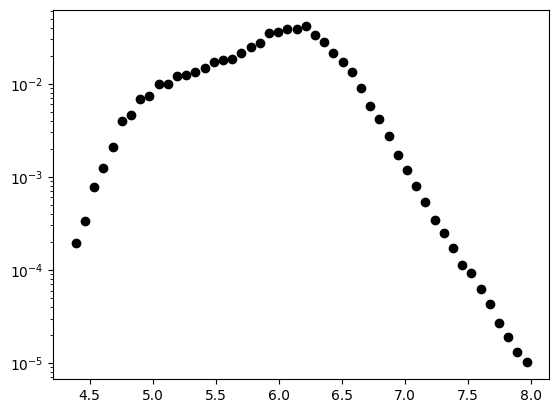

In [341]:
#t3 H4a: Median
data = plt.scatter(x_t3H4a, t3_, color='black', label='Data')
plt.yscale('log')

data_points = data.get_offsets()
x_unpacked = data_points[:, 0]
y_unpacked = data_points[:, 1]
a = y_unpacked[0]
b = y_unpacked[-1]
area = np.trapz(y_unpacked, x_unpacked)
sum_y = sum(y_unpacked)
y_testn = y_unpacked / sum_y
y_normalized = y_unpacked / area
normalized_area = np.trapz(y_normalized, x_unpacked)

target = 0.5
#sum y's in dataframe until sum reaches 0.5
def sum_until_target(y_testn, target):
    current_sum = 0
    included_indices = []
    for i, num in enumerate(y_testn):
        if current_sum + num <= target:
            current_sum += num
            included_indices.append(i)
        else:
            break
    return current_sum, included_indices
sum_result, indices = sum_until_target(y_testn, target)
    
median_len_x = len(indices)
#print(median_len_x)
median_x3 = x_unpacked[median_len_x]
print('Median of Data:', round(median_x3, 2), 'GV')

Mean is: 5.9 GV
Median is: 5.99 GV


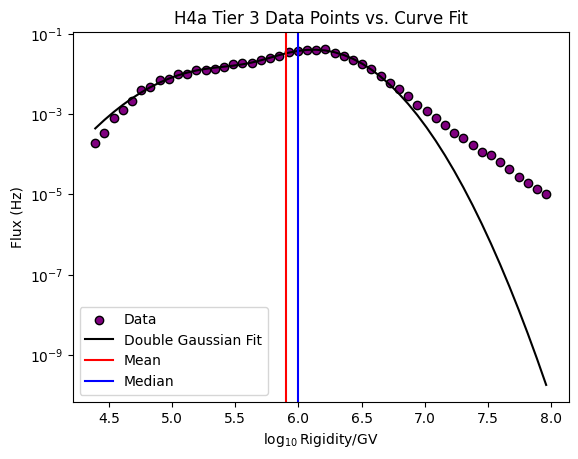

In [342]:
#T3 H4a plotted

plt.scatter(x_t3H4a, t3_, ec='black', color='purple', label='Data')
plt.plot(x_t3H4a, y3H_fit, color='black', label='Double Gaussian Fit')
plt.yscale('log')

print("Mean is:", round(result3, 2), "GV")
print("Median is:", round(median_x3, 2), "GV")
plt.axvline(result3, color='red', label='Mean')
plt.axvline(median_x3, color='blue', label='Median')

plt.xlabel('$\log_{{10}}$Rigidity/GV')
plt.ylabel('Flux (Hz)')
plt.title('H4a Tier 3 Data Points vs. Curve Fit')

plt.legend()
ax.legend(bbox_to_anchor=(1.20, 1.05))
plt.show()

In [283]:
#H4a: Tier 4
x_t4H4a = (binst4_[1:] + binst4_[:-1])/2

def double_gaussian(x_t4H4a, A1, x0, sigma1, A2, x0_, sigma2):
    return (A1 * np.exp(-((x_t4H4a - x0) **2) / (2 * (sigma1 **2)))) + (A2 * np.exp(-((x_t4H4a - x0_) **2) / (2 * (sigma2 **2))))

initial_guess = [0.005, 5, 0.718, 0.005, 6.5, 0.874]
#popt: array of optimal values for the parameters
#pcov: covariance matrix the parameter estimates
#error: square root of diagonal of covariance matrix
popt4, pcov4 = curve_fit(double_gaussian, x_t4H4a, t4_, p0=initial_guess)
err4 = np.sqrt(np.diag(pcov4))

print('Fit values for Double Gaussian Curve:')
print(popt4)
print('--------------------------------')
print('Covariance Matrix for Fit Values:')
print(pcov4)
print('--------------------------------')
print('Error of Fit:')
print(err4)
y4H_fit = (popt4[0] * np.exp(-((x_t4H4a - popt4[1]) **2) / (2 * (popt4[2] **2)))) + (popt4[3] * np.exp(-((x_t4H4a - popt4[4]) **2) / (2 * (popt4[5] **2))))

Fit values for Double Gaussian Curve:
[-4.64742506e-03  6.08321731e+00 -2.54493172e-01  8.12445463e-03
  6.18692857e+00  4.43374789e-01]
--------------------------------
Covariance Matrix for Fit Values:
[[ 9.31409104e-07 -6.51152859e-06  1.88624945e-05 -9.47019812e-07
   9.84445042e-06  1.25772908e-05]
 [-6.51152859e-06  1.38734912e-04 -1.23778082e-04  6.88422228e-06
  -1.52392873e-05 -1.12237249e-04]
 [ 1.88624945e-05 -1.23778082e-04  4.50143593e-04 -1.96558031e-05
   2.08375256e-04  2.36489793e-04]
 [-9.47019812e-07  6.88422228e-06 -1.96558031e-05  9.71504605e-07
  -9.89020113e-06 -1.28888405e-05]
 [ 9.84445042e-06 -1.52392873e-05  2.08375256e-04 -9.89020113e-06
   1.51649064e-04  1.17913028e-04]
 [ 1.25772908e-05 -1.12237249e-04  2.36489793e-04 -1.28888405e-05
   1.17913028e-04  1.96557359e-04]]
--------------------------------
Error of Fit:
[0.0009651  0.01177858 0.02121659 0.00098565 0.01231459 0.01401989]


In [284]:
#Tier 4 H4a: Finding Mean

#use expected value function <x> = int( x * f(x) dx) / int(f(x) dx where f is curve fit (PDF)
integrand_top = lambda x: x * ((popt4[0] * np.exp(-((x - popt4[1]) **2) / (2 * (popt4[2] **2)))) + (popt4[3] * np.exp(-((x - popt4[4]) **2) / (2 * (popt4[5] **2)))))
integrand_bottom = lambda x: (popt4[0] * np.exp(-((x - popt4[1]) **2) / (2 * (popt4[2] **2)))) + (popt4[3] * np.exp(-((x - popt4[4]) **2) / (2 * (popt4[5] **2))))
a = 0 #a and b are bounds of integral
b = x_t4H4a[-1]

result_top, error_top = integrate.quad(integrand_top, a, b) #taking integral
result_bottom, error_bottom = integrate.quad(integrand_bottom, a, b)
result4 = result_top / result_bottom

Median of Data: 6.31 GV


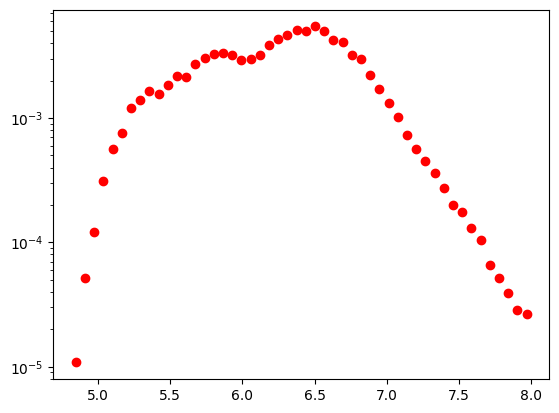

In [285]:
#t4 H4a: finding median
data = plt.scatter(x_t4H4a, t4_, color='red', label='Data')
plt.yscale('log')

data_points = data.get_offsets()
x_unpacked = data_points[:, 0]
y_unpacked = data_points[:, 1]
a = y_unpacked[0]
b = y_unpacked[-1]
area = np.trapz(y_unpacked, x_unpacked)
sum_y = sum(y_unpacked)
y_testn = y_unpacked / sum_y
y_normalized = y_unpacked / area
normalized_area = np.trapz(y_normalized, x_unpacked)

target = 0.5
#sum y's in dataframe until sum reaches 0.5
def sum_until_target(y_testn, target):
    current_sum = 0
    included_indices = []
    for i, num in enumerate(y_testn):
        if current_sum + num <= target:
            current_sum += num
            included_indices.append(i)
        else:
            break
    return current_sum, included_indices
sum_result, indices = sum_until_target(y_testn, target)
    
median_len_x = len(indices)
#print(median_len_x)
median_x4 = x_unpacked[median_len_x]
print('Median of Data:', round(median_x4, 2), 'GV')

Mean is: 6.24 GV
Median is: 6.31 GV


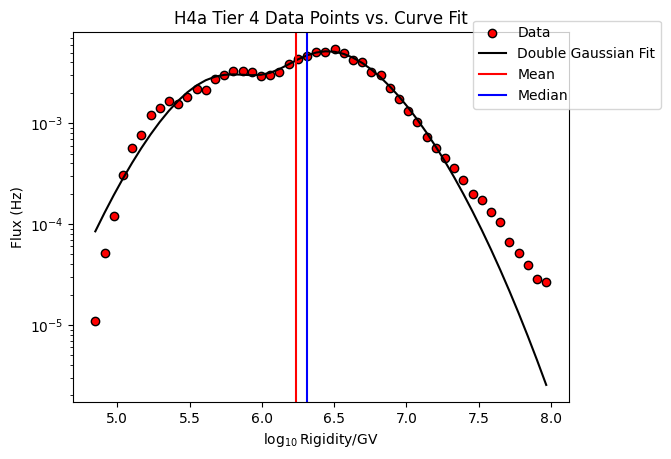

In [286]:
#T4 H4a print
ax = plt.subplot(1, 1, 1)
 
data = plt.scatter(x_t4H4a, t4_, ec='black', color='red', label='Data')
plt.plot(x_t4H4a, y4H_fit, color='black', label='Double Gaussian Fit')
plt.yscale('log')

print("Mean is:", round(result4, 2), "GV")
print("Median is:", round(median_x4, 2), "GV")
plt.axvline(result4, color='red', label='Mean')
plt.axvline(median_x4, color='blue', label='Median')

plt.xlabel('$\log_{{10}}$Rigidity/GV')
plt.ylabel('Flux (Hz)')
plt.title('H4a Tier 4 Data Points vs. Curve Fit')

plt.legend()
ax.legend(bbox_to_anchor=(1.20, 1.05))
plt.show()

In [287]:
#Tier 1 GSF
x_t1GSF = (binst1[1:] + binst1[:-1])/2

def double_gaussian(x_t1GSF, A1, x0, sigma1, A2, x0_, sigma2):
    return (A1 * np.exp(-((x_t1GSF - x0) **2) / (2 * (sigma1 **2)))) + (A2 * np.exp(-((x_t1GSF - x0_) **2) / (2 *(sigma2 **2))))
initial_guess = [0.1, 4.2, 0.8, 0.3, 5.5, 1.2]
popt11, pcov11 = curve_fit(double_gaussian, x_t1GSF, t1, p0=initial_guess, maxfev=500000)
err11 = np.sqrt(np.diag(pcov11))

print('Fit values for Double Gaussian Curve:')
print(popt11)
print('--------------------------------')
print('Covariance Matrix for Fit Values:')
print(pcov11)
print('--------------------------------')
print('Error of Fit:')
print(err11)
y1G_fit = (popt11[0] * np.exp(-((x_t1GSF - popt11[1]) **2) / (2 * (popt11[2] **2)))) + (popt11[3] * np.exp(-((x_t1GSF - popt11[4]) **2) / (2 *(popt11[5] **2))))

Fit values for Double Gaussian Curve:
[0.08067214 4.78669547 0.65184984 0.24284818 5.30583678 0.31065887]
--------------------------------
Covariance Matrix for Fit Values:
[[ 2.29356730e-04  1.80800823e-03 -2.23085187e-05 -2.69654537e-04
   7.52653328e-05 -2.50667379e-04]
 [ 1.80800823e-03  1.91681739e-02  2.69717618e-03 -2.62802643e-03
   2.15342589e-05 -2.23034035e-03]
 [-2.23085187e-05  2.69717618e-03  3.62536153e-03 -3.54555713e-04
  -5.33602445e-04 -2.69141155e-04]
 [-2.69654537e-04 -2.62802643e-03 -3.54555713e-04  4.04090870e-04
  -2.14428433e-05  3.00068380e-04]
 [ 7.52653328e-05  2.15342589e-05 -5.33602445e-04 -2.14428433e-05
   1.79599041e-04 -3.83590050e-05]
 [-2.50667379e-04 -2.23034035e-03 -2.69141155e-04  3.00068380e-04
  -3.83590050e-05  3.67323946e-04]]
--------------------------------
Error of Fit:
[0.01514453 0.13844917 0.06021098 0.02010201 0.01340146 0.0191657 ]


In [288]:
#Tier 1 GSF: Finding Mean

#use expected value function <x> = int( x * f(x) dx) / int(f(x) dx where f is curve fit (PDF)
integrand_top = lambda x: x * ((popt11[0] * np.exp(-((x - popt11[1]) **2) / (2 * (popt11[2] **2)))) + (popt11[3] * np.exp(-((x - popt11[4]) **2) / (2 * (popt11[5] **2)))))
integrand_bottom = lambda x: (popt11[0] * np.exp(-((x - popt11[1]) **2) / (2 * (popt11[2] **2)))) + (popt11[3] * np.exp(-((x - popt11[4]) **2) / (2 * (popt11[5] **2))))
a = 0 #a and b are bounds of integral
b = x_t1GSF[-1]

result_top, error_top = integrate.quad(integrand_top, a, b) #taking integral
result_bottom, error_bottom = integrate.quad(integrand_bottom, a, b)
result33 = result_top / result_bottom

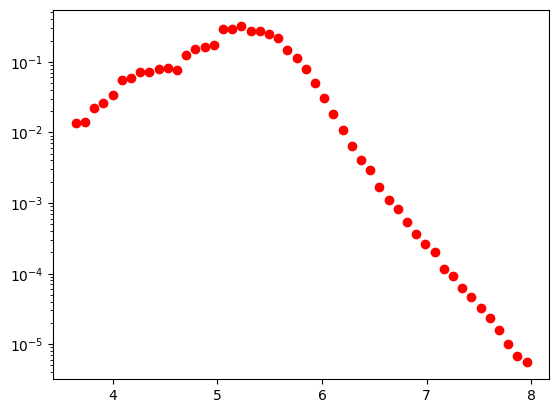

In [289]:
#t1 GSF: finding median
data = plt.scatter(x_t1GSF, t1, color='red', label='Data')
plt.yscale('log')

data_points = data.get_offsets()
x_unpacked = data_points[:, 0]
y_unpacked = data_points[:, 1]
a = y_unpacked[0]
b = y_unpacked[-1]
area = np.trapz(y_unpacked, x_unpacked)
sum_y = sum(y_unpacked)
y_testn = y_unpacked / sum_y
y_normalized = y_unpacked / area
normalized_area = np.trapz(y_normalized, x_unpacked)

target = 0.5
#sum y's in dataframe until sum reaches 0.5
def sum_until_target(y_testn, target):
    current_sum = 0
    included_indices = []
    for i, num in enumerate(y_testn):
        if current_sum + num <= target:
            current_sum += num
            included_indices.append(i)
        else:
            break
    return current_sum, included_indices
sum_result, indices = sum_until_target(y_testn, target)
    
median_len_x = len(indices)
#print(median_len_x)
median_x11 = x_unpacked[median_len_x]
#print('Median of Data:', round(median_x22, 2), 'GV')

Mean is: 5.12 GV
Median is: 5.23 GV


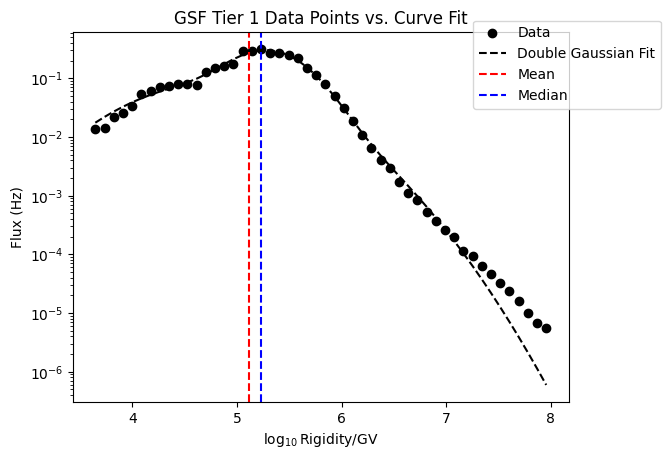

In [290]:
#T1 GSF print
ax = plt.subplot(1, 1, 1)
 
data = plt.scatter(x_t1GSF, t1, color='black', label='Data')
plt.plot(x_t1GSF, y1G_fit, color='black', linestyle='dashed', label='Double Gaussian Fit')
plt.yscale('log')

print("Mean is:", round(result11, 2), "GV")
print("Median is:", round(median_x11, 2), "GV")
plt.axvline(result11, color='red', label='Mean', linestyle='dashed')
plt.axvline(median_x11, color='blue', label='Median', linestyle='dashed')

plt.xlabel('$\log_{{10}}$Rigidity/GV')
plt.ylabel('Flux (Hz)')
plt.title('GSF Tier 1 Data Points vs. Curve Fit')

plt.legend()
ax.legend(bbox_to_anchor=(1.20, 1.05))
plt.show()

In [309]:
#Tier 2 GSF
x_t2GSF = (binst2[1:] + binst2[:-1])/2

def double_gaussian(x_t2GSF, A1, x0, sigma1, A2, x0_, sigma2):
    return (A1 * np.exp(-((x_t2GSF - x0) **2) / (2 * (sigma1 **2)))) + (A2 * np.exp(-((x_t2GSF - x0_) **2) / (2 *(sigma2 **2))))
initial_guess = [0.1, 4.5, 0.8, 0.3, 5.2, 1.2]
popt22, pcov22 = curve_fit(double_gaussian, x_t2GSF, t2, p0=initial_guess, maxfev=500000)
err22 = np.sqrt(np.diag(pcov22))

print('Fit values for Double Gaussian Curve:')
print(popt22)
print('--------------------------------')
print('Covariance Matrix for Fit Values:')
print(pcov22)
print('--------------------------------')
print('Error of Fit:')
print(err22)
y2G_fit = (popt22[0] * np.exp(-((x_t2GSF - popt22[1]) **2) / (2 * (popt22[2] **2)))) + (popt22[3] * np.exp(-((x_t2GSF - popt22[4]) **2) / (2 *(popt22[5] **2))))

Fit values for Double Gaussian Curve:
[0.10737784 5.43548729 0.57311178 0.12082346 5.86076845 0.26201487]
--------------------------------
Covariance Matrix for Fit Values:
[[ 2.01557835e-05  9.42484488e-05 -4.88165881e-06 -2.24171577e-05
   1.02316099e-05 -3.82230165e-05]
 [ 9.42484488e-05  6.39120706e-04  7.87472610e-05 -1.32656202e-04
  -1.23661628e-05 -2.05833241e-04]
 [-4.88165881e-06  7.87472610e-05  1.23039516e-04 -1.28553804e-05
  -5.13232515e-05 -1.90675972e-05]
 [-2.24171577e-05 -1.32656202e-04 -1.28553804e-05  3.26995878e-05
  -1.89219905e-06  4.19007148e-05]
 [ 1.02316099e-05 -1.23661628e-05 -5.13232515e-05 -1.89219905e-06
   5.08731308e-05 -7.45072997e-06]
 [-3.82230165e-05 -2.05833241e-04 -1.90675972e-05  4.19007148e-05
  -7.45072997e-06  1.01935812e-04]]
--------------------------------
Error of Fit:
[0.00448952 0.02528084 0.01109232 0.00571836 0.00713254 0.01009633]


In [310]:
#Tier 2 GSF: Finding Mean

#use expected value function <x> = int( x * f(x) dx) / int(f(x) dx where f is curve fit (PDF)
integrand_top = lambda x: x * ((popt22[0] * np.exp(-((x - popt22[1]) **2) / (2 * (popt22[2] **2)))) + (popt22[3] * np.exp(-((x - popt22[4]) **2) / (2 * (popt22[5] **2)))))
integrand_bottom = lambda x: (popt22[0] * np.exp(-((x - popt22[1]) **2) / (2 * (popt22[2] **2)))) + (popt22[3] * np.exp(-((x - popt22[4]) **2) / (2 * (popt22[5] **2))))
a = 0 #a and b are bounds of integral
b = x_t2GSF[-1]

result_top, error_top = integrate.quad(integrand_top, a, b) #taking integral
result_bottom, error_bottom = integrate.quad(integrand_bottom, a, b)
result22 = result_top / result_bottom

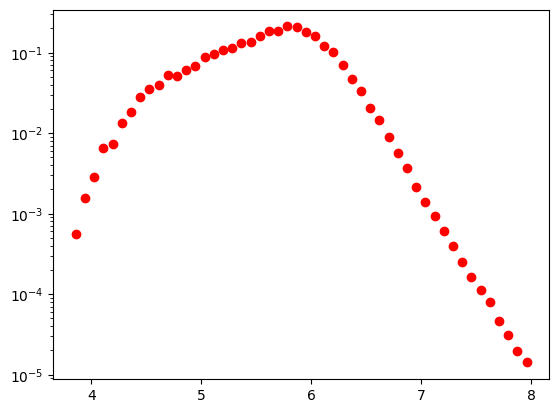

In [311]:
#t2 GSF: finding median
data = plt.scatter(x_t2GSF, t2, color='red', label='Data')
plt.yscale('log')

data_points = data.get_offsets()
x_unpacked = data_points[:, 0]
y_unpacked = data_points[:, 1]
a = y_unpacked[0]
b = y_unpacked[-1]
area = np.trapz(y_unpacked, x_unpacked)
sum_y = sum(y_unpacked)
y_testn = y_unpacked / sum_y
y_normalized = y_unpacked / area
normalized_area = np.trapz(y_normalized, x_unpacked)

target = 0.5
#sum y's in dataframe until sum reaches 0.5
def sum_until_target(y_testn, target):
    current_sum = 0
    included_indices = []
    for i, num in enumerate(y_testn):
        if current_sum + num <= target:
            current_sum += num
            included_indices.append(i)
        else:
            break
    return current_sum, included_indices
sum_result, indices = sum_until_target(y_testn, target)
    
median_len_x = len(indices)
#print(median_len_x)
median_x22 = x_unpacked[median_len_x]
#print('Median of Data:', round(median_x22, 2), 'GV')

Mean is: 5.58 GV
Median is: 5.62 GV


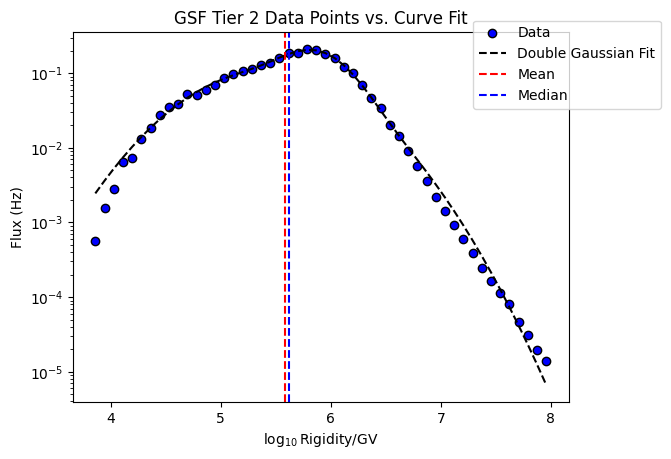

In [312]:
#T2 GSF print
ax = plt.subplot(1, 1, 1)
 
data = plt.scatter(x_t2GSF, t2, ec='black', color='blue', label='Data')
plt.plot(x_t2GSF, y2G_fit, color='black', linestyle='dashed', label='Double Gaussian Fit')
plt.yscale('log')

print("Mean is:", round(result22, 2), "GV")
print("Median is:", round(median_x22, 2), "GV")
plt.axvline(result22, color='red', linestyle='dashed', label='Mean')
plt.axvline(median_x22, color='blue', linestyle='dashed', label='Median')

plt.xlabel('$\log_{{10}}$Rigidity/GV')
plt.ylabel('Flux (Hz)')
plt.title('GSF Tier 2 Data Points vs. Curve Fit')

plt.legend()
ax.legend(bbox_to_anchor=(1.20, 1.05))
plt.show()

In [295]:
#Tier 3 GSF
x_t3GSF = (binst3[1:] + binst3[:-1])/2

def double_gaussian(x_t3GSF, A1, x0, sigma1, A2, x0_, sigma2):
    return (A1 * np.exp(-((x_t3GSF - x0) **2) / (2 * (sigma1 **2)))) + (A2 * np.exp(-((x_t3GSF - x0_) **2) / (2 *(sigma2 **2))))
initial_guess = [0.1, 5.0, 0.8, 0.3, 6.2, 0.8]
popt33, pcov33 = curve_fit(double_gaussian, x_t3GSF, t3, p0=initial_guess, maxfev=500000)
err33 = np.sqrt(np.diag(pcov33))

print('Fit values for Double Gaussian Curve:')
print(popt33)
print('--------------------------------')
print('Covariance Matrix for Fit Values:')
print(pcov33)
print('--------------------------------')
print('Error of Fit:')
print(err33)
y3G_fit = (popt33[0] * np.exp(-((x_t3GSF - popt33[1]) **2) / (2 * (popt33[2] **2)))) + (popt33[3] * np.exp(-((x_t3GSF - popt33[4]) **2) / (2 *(popt33[5] **2))))

Fit values for Double Gaussian Curve:
[0.01469746 5.77033931 0.60540908 0.02564142 6.2265726  0.23762174]
--------------------------------
Covariance Matrix for Fit Values:
[[ 4.52270077e-07  1.60884298e-05 -2.31048397e-06 -4.65332278e-07
   1.24595751e-06 -4.27013027e-06]
 [ 1.60884298e-05  1.00557853e-03  1.09178250e-04 -2.39576391e-05
  -1.69911527e-05 -1.95321356e-04]
 [-2.31048397e-06  1.09178250e-04  2.72066768e-04 -2.27325633e-06
  -5.79187204e-05 -1.73578609e-05]
 [-4.65332278e-07 -2.39576391e-05 -2.27325633e-06  8.04114680e-07
  -4.19340909e-08  4.13128235e-06]
 [ 1.24595751e-06 -1.69911527e-05 -5.79187204e-05 -4.19340909e-08
   3.70398179e-05 -2.83483417e-06]
 [-4.27013027e-06 -1.95321356e-04 -1.73578609e-05  4.13128235e-06
  -2.83483417e-06  6.84658136e-05]]
--------------------------------
Error of Fit:
[0.00067251 0.03171086 0.01649445 0.00089672 0.00608603 0.00827441]


In [296]:
#Tier 3 GSF: Finding Mean

#use expected value function <x> = int( x * f(x) dx) / int(f(x) dx where f is curve fit (PDF)
integrand_top = lambda x: x * ((popt33[0] * np.exp(-((x - popt33[1]) **2) / (2 * (popt33[2] **2)))) + (popt33[3] * np.exp(-((x - popt33[4]) **2) / (2 * (popt33[5] **2)))))
integrand_bottom = lambda x: (popt33[0] * np.exp(-((x - popt33[1]) **2) / (2 * (popt33[2] **2)))) + (popt33[3] * np.exp(-((x - popt33[4]) **2) / (2 * (popt33[5] **2))))
a = 0 #a and b are bounds of integral
b = x_t3GSF[-1]

result_top, error_top = integrate.quad(integrand_top, a, b) #taking integral
result_bottom, error_bottom = integrate.quad(integrand_bottom, a, b)
result33 = result_top / result_bottom

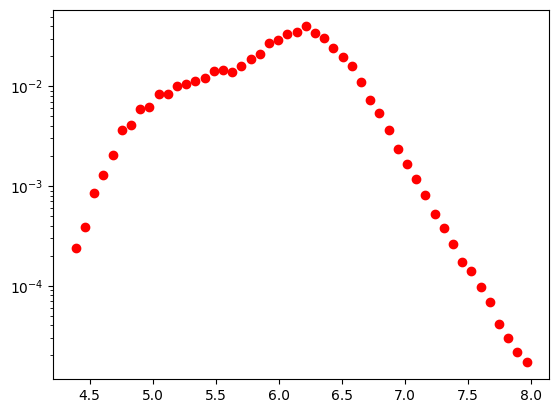

In [297]:
#t3 GSF: finding median
data = plt.scatter(x_t3GSF, t3, color='red', label='Data')
plt.yscale('log')

data_points = data.get_offsets()
x_unpacked = data_points[:, 0]
y_unpacked = data_points[:, 1]
a = y_unpacked[0]
b = y_unpacked[-1]
area = np.trapz(y_unpacked, x_unpacked)
sum_y = sum(y_unpacked)
y_testn = y_unpacked / sum_y
y_normalized = y_unpacked / area
normalized_area = np.trapz(y_normalized, x_unpacked)

target = 0.5
#sum y's in dataframe until sum reaches 0.5
def sum_until_target(y_testn, target):
    current_sum = 0
    included_indices = []
    for i, num in enumerate(y_testn):
        if current_sum + num <= target:
            current_sum += num
            included_indices.append(i)
        else:
            break
    return current_sum, included_indices
sum_result, indices = sum_until_target(y_testn, target)
    
median_len_x = len(indices)
#print(median_len_x)
median_x33 = x_unpacked[median_len_x]
#print('Median of Data:', round(median_x22, 2), 'GV')

Mean is: 5.96 GV
Median is: 6.07 GV


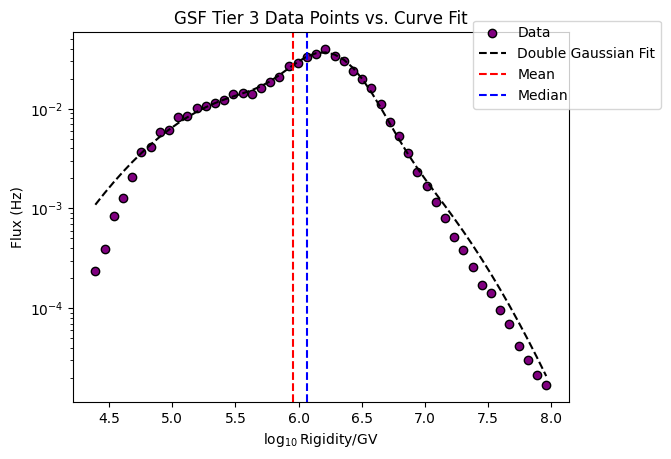

In [298]:
#T3 GSF print
ax = plt.subplot(1, 1, 1)
 
data = plt.scatter(x_t3GSF, t3, ec='black', color='purple', label='Data')
plt.plot(x_t3GSF, y3G_fit, color='black', linestyle='dashed', label='Double Gaussian Fit')
plt.yscale('log')

print("Mean is:", round(result33, 2), "GV")
print("Median is:", round(median_x33, 2), "GV")
plt.axvline(result33, color='red', linestyle='dashed', label='Mean')
plt.axvline(median_x33, color='blue', linestyle='dashed', label='Median')

plt.xlabel('$\log_{{10}}$Rigidity/GV')
plt.ylabel('Flux (Hz)')
plt.title('GSF Tier 3 Data Points vs. Curve Fit')

plt.legend()
ax.legend(bbox_to_anchor=(1.20, 1.05))
plt.show()

In [299]:
#Tier 4 GSF
x_t4GSF = (binst4[1:] + binst4[:-1])/2

def double_gaussian(x_t4GSF, A1, x0, sigma1, A2, x0_, sigma2):
    return (A1 * np.exp(-((x_t4GSF - x0) **2) / (2 * (sigma1 **2)))) + (A2 * np.exp(-((x_t4GSF - x0_) **2) / (2 *(sigma2 **2))))
initial_guess = [0.1, 5.0, 0.8, 0.3, 6.2, 1]
popt44, pcov44 = curve_fit(double_gaussian, x_t4GSF, t4, p0=initial_guess, maxfev=500000)
err44 = np.sqrt(np.diag(pcov44))

print('Fit values for Double Gaussian Curve:')
print(popt44)
print('--------------------------------')
print('Covariance Matrix for Fit Values:')
print(pcov44)
print('--------------------------------')
print('Error of Fit:')
print(err44)
y4G_fit = (popt44[0] * np.exp(-((x_t4GSF - popt44[1]) **2) / (2 * (popt44[2] **2)))) + (popt44[3] * np.exp(-((x_t4GSF - popt44[4]) **2) / (2 *(popt44[5] **2))))

Fit values for Double Gaussian Curve:
[ 7.52415899e-03  6.27374646e+00 -4.47959347e-01 -4.96879647e-03
  6.14031329e+00  2.66071959e-01]
--------------------------------
Covariance Matrix for Fit Values:
[[ 6.90840379e-07 -9.84904190e-06  8.83711208e-06 -6.77107597e-07
   5.69271364e-06  1.33474064e-05]
 [-9.84904190e-06  1.89911557e-04 -1.09109439e-04  9.89078284e-06
  -3.27119630e-05 -1.98968491e-04]
 [ 8.83711208e-06 -1.09109439e-04  1.38140278e-04 -8.62058687e-06
   9.55998660e-05  1.50817748e-04]
 [-6.77107597e-07  9.89078284e-06 -8.62058687e-06  6.69699109e-07
  -5.36005944e-06 -1.29161803e-05]
 [ 5.69271364e-06 -3.27119630e-05  9.55998660e-05 -5.36005944e-06
   1.14813199e-04  9.60016370e-05]
 [ 1.33474064e-05 -1.98968491e-04  1.50817748e-04 -1.29161803e-05
   9.60016370e-05  2.92731996e-04]]
--------------------------------
Error of Fit:
[0.00083117 0.01378084 0.01175331 0.00081835 0.01071509 0.01710941]


In [300]:
#Tier 4 GSF: Finding Mean

#use expected value function <x> = int( x * f(x) dx) / int(f(x) dx where f is curve fit (PDF)
integrand_top = lambda x: x * ((popt44[0] * np.exp(-((x - popt44[1]) **2) / (2 * (popt44[2] **2)))) + (popt44[3] * np.exp(-((x - popt44[4]) **2) / (2 * (popt44[5] **2)))))
integrand_bottom = lambda x: (popt44[0] * np.exp(-((x - popt44[1]) **2) / (2 * (popt44[2] **2)))) + (popt44[3] * np.exp(-((x - popt44[4]) **2) / (2 * (popt44[5] **2))))
a = 0 #a and b are bounds of integral
b = x_t4GSF[-1]

result_top, error_top = integrate.quad(integrand_top, a, b) #taking integral
result_bottom, error_bottom = integrate.quad(integrand_bottom, a, b)
result44 = result_top / result_bottom

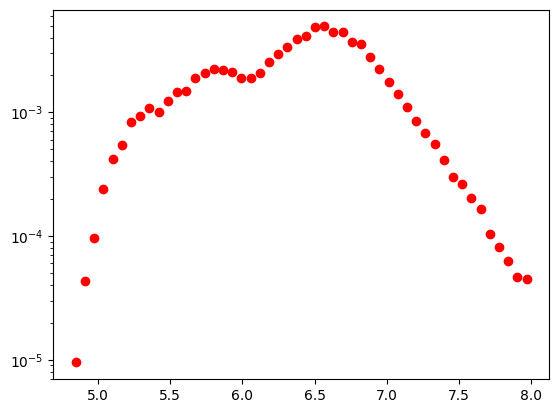

In [301]:
#t4 GSF: finding median
data = plt.scatter(x_t4GSF, t4, color='red', label='Data')
plt.yscale('log')

data_points = data.get_offsets()
x_unpacked = data_points[:, 0]
y_unpacked = data_points[:, 1]
a = y_unpacked[0]
b = y_unpacked[-1]
area = np.trapz(y_unpacked, x_unpacked)
sum_y = sum(y_unpacked)
y_testn = y_unpacked / sum_y
y_normalized = y_unpacked / area
normalized_area = np.trapz(y_normalized, x_unpacked)

target = 0.5
#sum y's in dataframe until sum reaches 0.5
def sum_until_target(y_testn, target):
    current_sum = 0
    included_indices = []
    for i, num in enumerate(y_testn):
        if current_sum + num <= target:
            current_sum += num
            included_indices.append(i)
        else:
            break
    return current_sum, included_indices
sum_result, indices = sum_until_target(y_testn, target)
    
median_len_x = len(indices)
#print(median_len_x)
median_x44 = x_unpacked[median_len_x]
#print('Median of Data:', round(median_x22, 2), 'GV')

Mean is: 6.36 GV
Median is: 6.44 GV


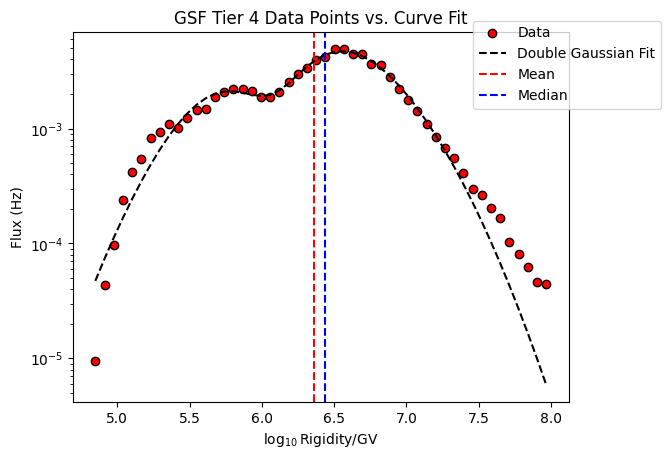

In [302]:
#T4 GSF print
ax = plt.subplot(1, 1, 1)
 
data = plt.scatter(x_t4GSF, t4, ec='black', color='red', label='Data')
plt.plot(x_t4GSF, y4G_fit, color='black', linestyle='dashed', label='Double Gaussian Fit')
plt.yscale('log')

print("Mean is:", round(result44, 2), "GV")
print("Median is:", round(median_x44, 2), "GV")
plt.axvline(result44, color='red', linestyle='dashed', label='Mean')
plt.axvline(median_x44, color='blue', linestyle='dashed', label='Median')

plt.xlabel('$\log_{{10}}$Rigidity/GV')
plt.ylabel('Flux (Hz)')
plt.title('GSF Tier 4 Data Points vs. Curve Fit')

plt.legend()
ax.legend(bbox_to_anchor=(1.20, 1.05))
plt.show()

H4a: Mean is: 5.14 GV
H4a: Median is: 5.23 GV
GSF: Mean is: 5.12 GV
GSF: Median is: 5.23 GV


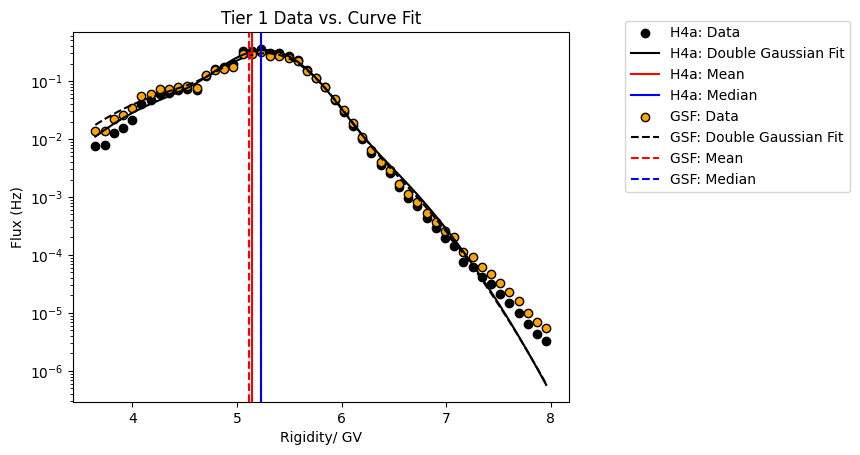

In [345]:
#All Tier 1
ax = plt.subplot(1, 1, 1) 
data = plt.scatter(x_t1H4a, t1_, color='black', label='H4a: Data') 
plt.plot(x_t1H4a, y1H_fit, color='black', label='H4a: Double Gaussian Fit') 
plt.yscale('log') 
print("H4a: Mean is:", round(result1, 2), "GV") 
print("H4a: Median is:", round(median_x1, 2), "GV") 
plt.axvline(result1, color='red', label='H4a: Mean') 
plt.axvline(median_x1, color='blue', label='H4a: Median')

data = plt.scatter(x_t1GSF, t1, ec='black', color='orange', label='GSF: Data') 
plt.plot(x_t1GSF, y1G_fit, color='black', linestyle='dashed', label='GSF: Double Gaussian Fit') 
plt.yscale('log')

print("GSF: Mean is:", round(result11, 2), "GV") 
print("GSF: Median is:", round(median_x11, 2), "GV") 
plt.axvline(result11, color='red', label='GSF: Mean', linestyle='dashed') 
plt.axvline(median_x11, color='blue', label='GSF: Median', linestyle='dashed')

plt.xlabel('Rigidity/ GV') 
plt.ylabel('Flux (Hz)') 
plt.title('Tier 1 Data vs. Curve Fit')

plt.legend() 
ax.legend(bbox_to_anchor=(1.1, 1.05)) 
plt.show()

H4a: Mean is: 5.58 GV
H4a: Median is: 5.62 GV
GSF: Mean is: 5.58 GV
GSF: Median is: 5.62 GV


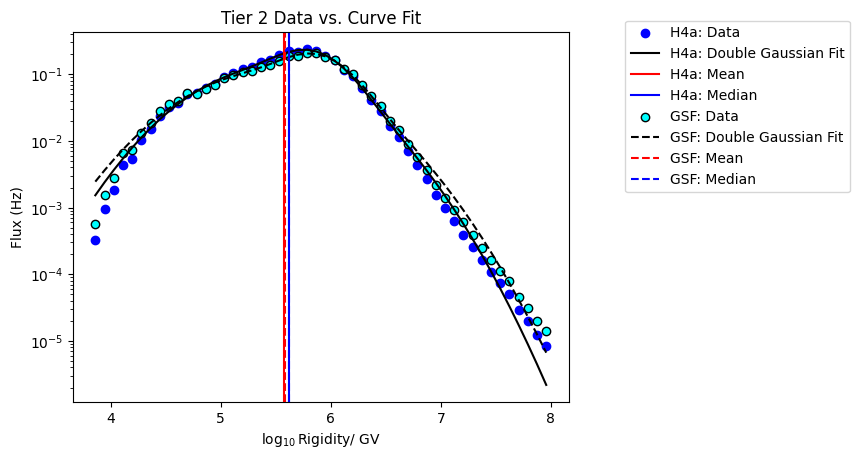

In [344]:
#All Tier 2

ax = plt.subplot(1, 1, 1)
data = plt.scatter(x_t2H4a, t2_, color='blue', label='H4a: Data')
plt.plot(x_t2H4a, y2H_fit, color='black', label='H4a: Double Gaussian Fit')
plt.yscale('log')
print("H4a: Mean is:", round(result2, 2), "GV")
print("H4a: Median is:", round(median_x2, 2), "GV")

plt.axvline(result2, color='red', label='H4a: Mean')
plt.axvline(median_x2, color='blue', label='H4a: Median')

data = plt.scatter(x_t2GSF, t2, ec='black', color='cyan', label='GSF: Data')
plt.plot(x_t2GSF, y2G_fit, color='black', linestyle='dashed', label='GSF: Double Gaussian Fit')
plt.yscale('log')

print("GSF: Mean is:", round(result22, 2), "GV")
print("GSF: Median is:", round(median_x22, 2), "GV")
plt.axvline(result22, color='red', label='GSF: Mean', linestyle='dashed')
plt.axvline(median_x22, color='blue', label='GSF: Median', linestyle='dashed')


plt.xlabel('$\log_{{10}}$Rigidity/ GV')
plt.ylabel('Flux (Hz)')
plt.title('Tier 2 Data vs. Curve Fit')

plt.legend()
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

H4a: Mean is: 5.9 GV
H4a: Median is: 5.99 GV
GSF: Mean is: 5.96 GV
GSF: Median is: 6.07 GV


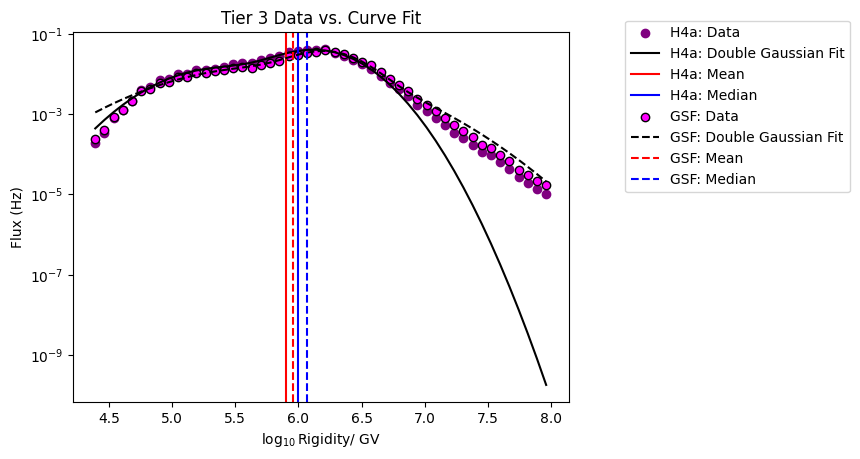

In [346]:
#All Tier 3

ax = plt.subplot(1, 1, 1)
data = plt.scatter(x_t3H4a, t3_, color='purple', label='H4a: Data')
plt.plot(x_t3H4a, y3H_fit, color='black', label='H4a: Double Gaussian Fit')
plt.yscale('log')
print("H4a: Mean is:", round(result3, 2), "GV")
print("H4a: Median is:", round(median_x3, 2), "GV")

plt.axvline(result3, color='red', label='H4a: Mean')
plt.axvline(median_x3, color='blue', label='H4a: Median')

data = plt.scatter(x_t3GSF, t3, ec='black', color='magenta', label='GSF: Data')
plt.plot(x_t3GSF, y3G_fit, color='black', linestyle='dashed', label='GSF: Double Gaussian Fit')
plt.yscale('log')

print("GSF: Mean is:", round(result33, 2), "GV")
print("GSF: Median is:", round(median_x33, 2), "GV")
plt.axvline(result33, color='red', label='GSF: Mean', linestyle='dashed')
plt.axvline(median_x33, color='blue', label='GSF: Median', linestyle='dashed')


plt.xlabel('$\log_{{10}}$Rigidity/ GV')
plt.ylabel('Flux (Hz)')
plt.title('Tier 3 Data vs. Curve Fit')

plt.legend()
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

H4a: Mean is: 6.24 GV
H4a: Median is: 6.31 GV
GSF: Mean is: 6.36 GV
GSF: Median is: 6.44 GV


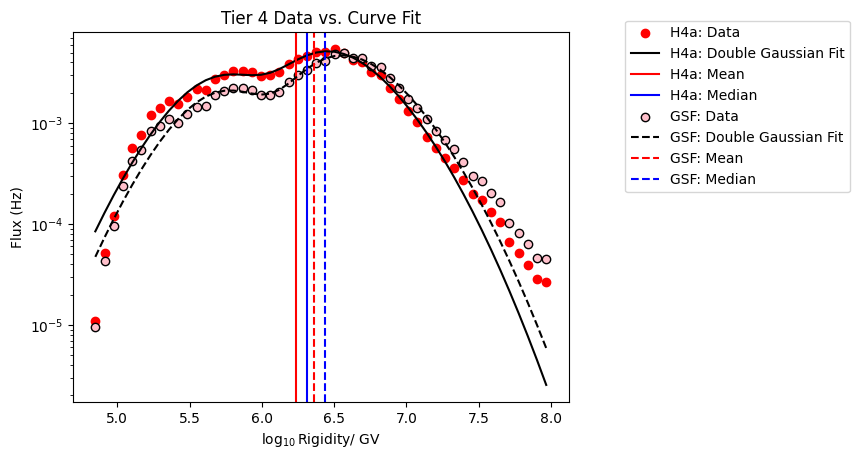

In [347]:
#All Tier 4
ax = plt.subplot(1, 1, 1)
data = plt.scatter(x_t4H4a, t4_, color='red', label='H4a: Data')
plt.plot(x_t4H4a, y4H_fit, color='black', label='H4a: Double Gaussian Fit')
plt.yscale('log')
print("H4a: Mean is:", round(result4, 2), "GV")
print("H4a: Median is:", round(median_x4, 2), "GV")

plt.axvline(result4, color='red', label='H4a: Mean')
plt.axvline(median_x4, color='blue', label='H4a: Median')

data = plt.scatter(x_t4GSF, t4, ec='black', color='pink', label='GSF: Data')
plt.plot(x_t4GSF, y4G_fit, color='black', linestyle='dashed', label='GSF: Double Gaussian Fit')
plt.yscale('log')

print("GSF: Mean is:", round(result44, 2), "GV")
print("GSF: Median is:", round(median_x44, 2), "GV")
plt.axvline(result44, color='red', label='GSF: Mean', linestyle='dashed')
plt.axvline(median_x44, color='blue', label='GSF: Median', linestyle='dashed')


plt.xlabel('$\log_{{10}}$Rigidity/ GV')
plt.ylabel('Flux (Hz)')
plt.title('Tier 4 Data vs. Curve Fit')

plt.legend()
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [ ]:
]